<b><font size="5">Imports and load dataset</font></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#to display all rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

In [2]:
ipl_df=pd.read_csv('IPL_ball_by_ball_updated.csv')

<b><font size="5">Sneak peak into the data</font></b>

In [3]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ipl_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [5]:
ipl_df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [6]:
ipl_df=ipl_df[(ipl_df.innings==1)|(ipl_df.innings==2) ]

In [7]:
ipl_df.innings.unique()

array([2, 1], dtype=int64)

<b><font size="5">Additional columns-total runs in a ball, is there a wicket fall in that ball</font></b>

In [8]:
ipl_df['total_runs']=ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'],axis=1)

In [9]:
ipl_df.head(20)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [10]:
type(ipl_df['player_dismissed'][13])

str

In [11]:
#so whenever type of player_dismissed is str- there has been a wicket fallen

In [12]:
ipl_df['isOut']=ipl_df['player_dismissed'].apply(lambda x: 1 if type(x)==type('abcd') else 0)

In [13]:
ipl_df.head(14)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


<b><font size="5"> Choose Teams </font></b>

In [14]:
t1='Punjab Kings'
t2='Delhi Capitals'

<b><font size="5"> Choose a match between the teams </font></b>

In [15]:
ipl_df[(ipl_df.batting_team==t1) & (ipl_df.bowling_team==t2) & (ipl_df.innings==1)].match_id.unique()

array([1254068, 1254086], dtype=int64)

In [16]:
matchID=1254086

<b><font size="5"> Outcomes </font></b>

In [17]:
#0,1,2,3,4,5,6,7,'W','extras'
outcomes=[0,1,2,3,4,6,'W']

In [18]:
for outcome in outcomes:
    print(outcome)

0
1
2
3
4
6
W


In [19]:
ipl_df[ipl_df.batting_team==t1].total_runs.value_counts()

1    743
0    576
4    155
2    104
6    93 
5    3  
3    2  
Name: total_runs, dtype: int64

In [20]:
ipl_df[ipl_df.batting_team==t1].isOut.sum()

81

In [21]:
t1_outcomes=ipl_df[ipl_df.batting_team==t1].total_runs.value_counts()
t2_outcomes=ipl_df[ipl_df.batting_team==t2].total_runs.value_counts()

In [22]:
t2_outcomes

1    2623
0    1932
4    712 
2    392 
6    241 
3    15  
5    6   
7    1   
Name: total_runs, dtype: int64

In [23]:
t1_outs=ipl_df[ipl_df.batting_team==t1].isOut.sum()
t2_outs=ipl_df[ipl_df.batting_team==t2].isOut.sum()


In [24]:
t1_outs

81

In [25]:
for outcome in outcomes:
    print(outcome)

0
1
2
3
4
6
W


In [26]:
t1_outcomes[3]

2

In [27]:
t1_outcomes[6]

93

In [28]:
t1_outcomes[5]

3

In [29]:
for outcome in outcomes:
    print(outcome)

0
1
2
3
4
6
W


In [30]:
#outcome is the index of the list 'outcome', except for 'W' as it is not there in the value counts output
t1_outcomes_count=[]
t2_outcomes_count=[]
for outcome in outcomes:
    if outcome !='W':
        t1_outcomes_count.append(t1_outcomes[outcome])
        t2_outcomes_count.append(t2_outcomes[outcome])
    else:
        t1_outcomes_count.append(t1_outs)
        t2_outcomes_count.append(t2_outs)

In [31]:
t1_outcomes_count,t2_outcomes_count

([576, 743, 104, 2, 155, 93, 81], [1932, 2623, 392, 15, 712, 241, 290])

In [32]:
#Finding probability of each outcome
t1_outcome_pb=[round(i/sum(t1_outcomes_count),5) for i in t1_outcomes_count]
t2_outcome_pb=[round(i/sum(t2_outcomes_count),5) for i in t2_outcomes_count]

In [33]:
t1_outcome_pb

[0.32839, 0.4236, 0.05929, 0.00114, 0.08837, 0.05302, 0.04618]

In [34]:
t2_outcome_pb

[0.31136, 0.42272, 0.06317, 0.00242, 0.11475, 0.03884, 0.04674]

In [35]:
#(0-->1)-we'll take cumulative sum for running simulation using probability- simulator
#dots=32.83%
#ones=32.83%+42.36%=75.19%


In [36]:
t1_cum_pb=np.cumsum(t1_outcome_pb)
t2_cum_pb=np.cumsum(t2_outcome_pb)

In [37]:
t1_cum_pb,t2_cum_pb

(array([0.32839, 0.75199, 0.81128, 0.81242, 0.90079, 0.95381, 0.99999]),
 array([0.31136, 0.73408, 0.79725, 0.79967, 0.91442, 0.95326, 1.     ]))

In [38]:
#now- how to use these probability to make predictions for a match


In [39]:
#np.random.random()-for returning a random value between 0 and 1
# np.random.random()

In [40]:
#so if output of random is between 0,0.32 then it is a dot0.32,0.75 then it is a single, if between 0.75 and 0.81, then it is
# a 2...so on.
#run it for all 120 balls and determine runs
pred_runs=0
pred_wks=0
balls=120

i1_p_0=t1_cum_pb[0]
i1_p_1=t1_cum_pb[1]
i1_p_2=t1_cum_pb[2]
i1_p_3=t1_cum_pb[3]
i1_p_4=t1_cum_pb[4]
i1_p_6=t1_cum_pb[5]
i1_p_W=t1_cum_pb[6]
    
for i in range(balls):
    r_value=np.random.random()

    if r_value<=i1_p_0:
        pred_runs += 0
    elif r_value<=i1_p_1:
        pred_runs += 1
    elif r_value<=i1_p_2:
        pred_runs += 2
    elif r_value<=i1_p_3:
        pred_runs += 3
    elif r_value<=i1_p_4:
        pred_runs += 4
    elif r_value<=i1_p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
#if predicted wickets=10, then stop the process.
        if pred_wks == 10:
            break
    

In [41]:
#simulator based on probabilty for predicting runs, wickets using historic data
pred_runs,pred_wks

(152, 5)

In [42]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [43]:
#getting balls from each ball(3.2,5.2 etc)
over_ball=19.5
over_no=int(str(over_ball).split('.')[0])
ball_no=int(str(over_ball).split('.')[1])
print(over_no*6 + ball_no)


119


In [44]:
#say 100-1 in 10 overs, runs prediction?

<b><font size="5">Function:1st innings runs prediction</font></b>

In [45]:
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    #initialize
    pred_runs=curr_score
    pred_wks=curr_wickets
    
    over_ball=curr_overs
    over_no=int(str(over_ball).split('.')[0])
    ball_no=int(str(over_ball).split('.')[1])
    
    if ball_no >= 6:
        ball_no = 6
    
    current_balls = over_no*6 + ball_no
    
    leftover_balls=120 - current_balls

    i1_p_0=t1_cum_pb[0]
    i1_p_1=t1_cum_pb[1]
    i1_p_2=t1_cum_pb[2]
    i1_p_3=t1_cum_pb[3]
    i1_p_4=t1_cum_pb[4]
    i1_p_6=t1_cum_pb[5]
    i1_p_W=t1_cum_pb[6]

    for i in range(leftover_balls):
        r_value=np.random.random()

        if r_value<=i1_p_0:
            pred_runs += 0
        elif r_value<=i1_p_1:
            pred_runs += 1
        elif r_value<=i1_p_2:
            pred_runs += 2
        elif r_value<=i1_p_3:
            pred_runs += 3
        elif r_value<=i1_p_4:
            pred_runs += 4
        elif r_value<=i1_p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
    #if predicted wickets=10, then stop the process.
            if pred_wks == 10:
                break
    return pred_runs
    

In [46]:
#innings_1_runs(curr_score,curr_wickets,curr_overs)

innings_1_runs(18.0,140,9)

150

<b><font size="5">Function:2nd innings runs prediction</font></b>

In [47]:
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    #initialize
    pred_runs=curr_score
    pred_wks=curr_wickets
    
    over_ball=curr_overs
    over_no=int(str(over_ball).split('.')[0])
    ball_no=int(str(over_ball).split('.')[1])
    
    if ball_no >= 6:
        ball_no = 6
    
    current_balls = over_no*6 + ball_no
    
    leftover_balls=120 - current_balls


    i2_p_0=t2_cum_pb[0]
    i2_p_1=t2_cum_pb[1]
    i2_p_2=t2_cum_pb[2]
    i2_p_3=t2_cum_pb[3]
    i2_p_4=t2_cum_pb[4]
    i2_p_6=t2_cum_pb[5]
    i2_p_W=t2_cum_pb[6]

    for i in range(leftover_balls):
        r_value=np.random.random()

        if r_value<=i2_p_0:
            pred_runs += 0
        elif r_value<=i2_p_1:
            pred_runs += 1
        elif r_value<=i2_p_2:
            pred_runs += 2
        elif r_value<=i2_p_3:
            pred_runs += 3
        elif r_value<=i2_p_4:
            pred_runs += 4
        elif r_value<=i2_p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
    #if predicted wickets=10, then stop the process.
            if pred_wks == 10:
                break
        if pred_runs>target:
            break
    return pred_runs

In [48]:
innings_2_runs(19.0,140,5,150)

143

In [49]:
mdf=ipl_df[ipl_df.match_id==matchID]

In [50]:
mdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
200177,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.1,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
200178,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.2,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0
200179,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.3,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
200180,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.4,Punjab Kings,Delhi Capitals,MA Agarwal,DJ Malan,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
200181,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,12.1,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,Lalit Yadav,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [51]:
mdf.reset_index(inplace=True,drop=True)

In [52]:
mdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.1,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.2,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0
2,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.3,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.4,Punjab Kings,Delhi Capitals,MA Agarwal,DJ Malan,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,12.1,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,Lalit Yadav,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [53]:
#Actual match prediction
df_i1=mdf[mdf.innings==1]
df_i2=mdf[mdf.innings==2]

In [54]:
df_i1.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.1,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,11.2,Punjab Kings,Delhi Capitals,DJ Malan,MA Agarwal,I Sharma,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0


In [55]:
df_i1=df_i1.sort_values('ball',ascending=True)
df_i2=df_i2.sort_values('ball',ascending=True)

In [56]:
df_i1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
75,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.1,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
77,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.2,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
74,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.3,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
72,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.4,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
71,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.5,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [57]:
df_i2.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
187,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,0.1,Delhi Capitals,Punjab Kings,PP Shaw,S Dhawan,RP Meredith,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
186,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,0.2,Delhi Capitals,Punjab Kings,S Dhawan,PP Shaw,RP Meredith,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
198,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,0.3,Delhi Capitals,Punjab Kings,S Dhawan,PP Shaw,RP Meredith,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
185,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,0.4,Delhi Capitals,Punjab Kings,S Dhawan,PP Shaw,RP Meredith,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
183,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,0.5,Delhi Capitals,Punjab Kings,PP Shaw,S Dhawan,RP Meredith,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [58]:
df_i1.reset_index(inplace=True,drop=True)
df_i2.reset_index(inplace=True,drop=True)

In [59]:
df_i1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.1,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.2,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.3,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.4,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",1,0.5,Punjab Kings,Delhi Capitals,P Simran Singh,MA Agarwal,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


<b><font size="5">Ball by ball runs prediction - 1st innings</font></b>

In [60]:
#initialize
curr_score=0
curr_wickets=0
curr_overs=0.0

i1_runs_pred=[]
for i in range(len(df_i1)):
    curr_score += df_i1.total_runs[i]
    curr_wickets += df_i1.isOut[i]
    curr_overs = df_i1.ball[i]
    
    prediction=innings_1_runs(curr_overs, curr_score, curr_wickets)
    i1_runs_pred.append(prediction)


In [61]:
#prediction of total score at the end of each ball-range(120-1)...., (120-119)
i1_runs_pred

[142,
 149,
 138,
 126,
 178,
 136,
 174,
 92,
 130,
 67,
 152,
 163,
 128,
 115,
 152,
 163,
 144,
 154,
 137,
 128,
 143,
 127,
 124,
 143,
 136,
 132,
 157,
 145,
 126,
 164,
 162,
 139,
 144,
 142,
 149,
 156,
 145,
 154,
 155,
 146,
 131,
 134,
 149,
 137,
 155,
 152,
 153,
 139,
 131,
 134,
 128,
 124,
 135,
 130,
 135,
 140,
 125,
 153,
 153,
 144,
 138,
 126,
 141,
 125,
 128,
 137,
 129,
 130,
 144,
 151,
 136,
 127,
 143,
 129,
 125,
 140,
 151,
 143,
 144,
 126,
 132,
 144,
 146,
 133,
 139,
 137,
 129,
 140,
 132,
 136,
 147,
 136,
 124,
 140,
 149,
 149,
 150,
 165,
 144,
 140,
 144,
 149,
 149,
 141,
 148,
 148,
 147,
 143,
 153,
 149,
 157,
 151,
 153,
 147,
 155,
 160,
 155,
 152,
 152,
 156,
 162,
 166]

In [62]:
#Actual score
i1_actual_score=sum(df_i1.total_runs)

In [63]:
i1_actual_score

166

<b><font size="5">1st Innings Runs prediction chart</font></b>

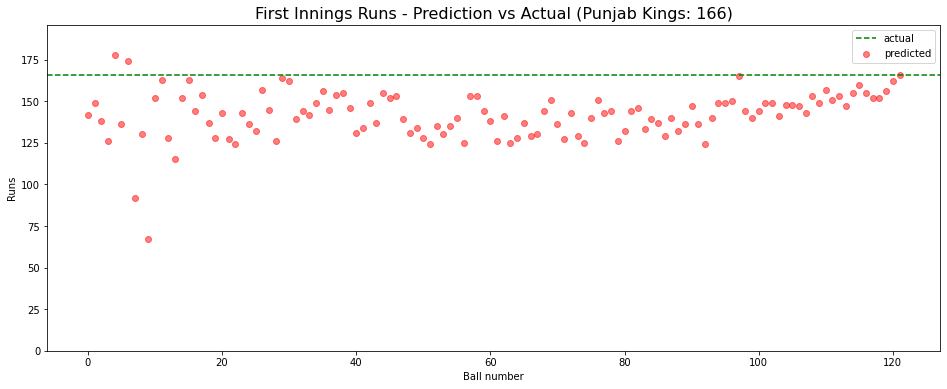

In [64]:
x_values=[i for i in range(len(i1_runs_pred))]
y_values=i1_runs_pred
plt.figure(figsize=(16,6))
plt.scatter(x_values,y_values,color='r',alpha=0.5,label='predicted')
plt.ylim(0,i1_actual_score+30)
plt.axhline(i1_actual_score,ls='--',color='g',label='actual')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(i1_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball number')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [65]:
#error - model is short by how many runs
i1_error=[abs(i - i1_actual_score) for i in i1_runs_pred]

<b><font size="5">Error in 1st innings runs</font></b>

In [66]:
np.mean(i1_error)

24.516393442622952

<b><font size="5">Ball by ball runs prediction - 2nd innings</font></b>

In [67]:
#initialize


curr_score=0
curr_wickets=0
curr_overs=0.0
target=i1_actual_score


i2_runs_pred=[]
for i in range(len(df_i2)):
    curr_score += df_i2.total_runs[i]
    curr_wickets += df_i2.isOut[i]
    curr_overs = df_i2.ball[i]
    
    prediction2=innings_2_runs(curr_overs, curr_score, curr_wickets,target)
    i2_runs_pred.append(prediction2)

In [68]:
i2_actual_score=sum(df_i2.total_runs)

<b><font size="5">2nd Innings Runs prediction chart</font></b>

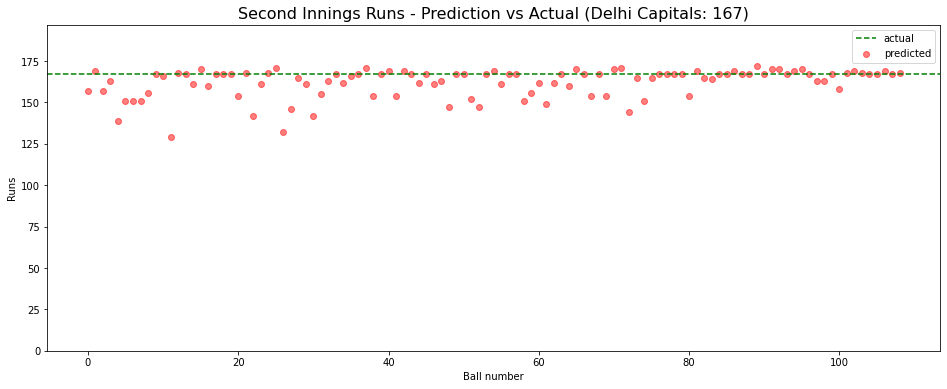

In [69]:
x_values=[i for i in range(len(i2_runs_pred))]
y_values=i2_runs_pred
plt.figure(figsize=(16,6))
plt.scatter(x_values,y_values,color='r',alpha=0.5,label='predicted')
plt.ylim(0,i2_actual_score+30)
plt.axhline(i2_actual_score,ls='--',color='g',label='actual')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(i2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball number')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [70]:
#error - model is short by how many runs
i2_error=[abs(i - i2_actual_score) for i in i2_runs_pred]

<b><font size="5">Error in 2nd innings runs</font></b>

In [71]:
np.mean(i2_error)

5.91743119266055

<b><font size="5">Win predictions - 1st innings</font></b>

In [72]:

# 1, 2 innings & predict win 

# for each ball make a prediction: 1st runs, 2nd runs, win/lose/tie
#initialize win/tie/lost w.r.t chasing team
win_count=0
tie_count=0
lose_count=0

#win tie lose prediction for each ball of the chasing team innings-summing this will give count say, 10,40,50(100 total)
win_count_ls=[]
tie_count_ls=[]
lose_count_ls=[]

i1_curr_score=0
i1_curr_overs=0.0
i1_curr_wickets=0

#each ball
for i in range(len(df_i1)):
    
    #1st innings values
    i1_curr_score += df_i1.total_runs[i]
    i1_curr_overs = df_i1.ball[i]
    i1_curr_wickets += df_i1.isOut[i]
    
    #2nd innings values
    i2_curr_score = 0
    i2_curr_overs = 0.0
    i2_curr_wickets = 0
    
    
    #for each ball, we run the simulator 100 times(say, 43% win, 17%tie, 40% lose)
    for j in range(100):
        
        ing1_runs_prediction=innings_1_runs(i1_curr_overs, i1_curr_score, i1_curr_wickets)
        target=ing1_runs_prediction
    
    #if innings 1 runs prediction is 170, if rcb chase it down, they win
        ing2_runs_prediction=innings_2_runs(i2_curr_overs, i2_curr_score, i2_curr_wickets,target)
    
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
        
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0
    

In [73]:
win_count_ls

[64,
 58,
 60,
 63,
 59,
 59,
 56,
 66,
 62,
 62,
 70,
 69,
 71,
 65,
 64,
 64,
 58,
 60,
 60,
 72,
 57,
 67,
 72,
 68,
 77,
 84,
 62,
 68,
 69,
 82,
 65,
 53,
 68,
 56,
 58,
 61,
 63,
 64,
 69,
 62,
 70,
 62,
 60,
 64,
 57,
 72,
 62,
 57,
 68,
 66,
 59,
 57,
 63,
 62,
 63,
 73,
 64,
 68,
 68,
 79,
 77,
 80,
 71,
 77,
 76,
 79,
 82,
 72,
 74,
 76,
 74,
 78,
 73,
 71,
 81,
 66,
 66,
 58,
 67,
 71,
 84,
 74,
 77,
 86,
 77,
 78,
 86,
 70,
 72,
 75,
 64,
 68,
 60,
 52,
 54,
 51,
 42,
 38,
 42,
 51,
 48,
 47,
 48,
 48,
 53,
 59,
 56,
 57,
 46,
 41,
 49,
 42,
 42,
 44,
 42,
 37,
 31,
 31,
 36,
 28,
 25,
 16]

In [74]:
tie_count_ls

[0,
 2,
 1,
 1,
 0,
 4,
 4,
 2,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 2,
 4,
 0,
 3,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 3,
 0,
 0,
 4,
 0,
 0,
 1,
 5,
 0,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 4,
 2,
 2,
 0,
 4,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 3,
 1,
 3,
 1,
 3,
 0,
 0,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 5,
 0,
 1,
 1,
 0,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 1,
 5,
 2,
 0,
 2,
 3,
 3,
 0,
 5,
 1,
 3]

In [75]:
lose_count_ls

[36,
 40,
 39,
 36,
 41,
 37,
 40,
 32,
 38,
 38,
 27,
 30,
 28,
 34,
 35,
 35,
 41,
 35,
 38,
 24,
 43,
 30,
 26,
 31,
 21,
 14,
 36,
 31,
 31,
 18,
 32,
 47,
 32,
 40,
 42,
 39,
 36,
 31,
 31,
 36,
 28,
 37,
 39,
 35,
 40,
 27,
 36,
 41,
 31,
 34,
 40,
 42,
 36,
 38,
 34,
 26,
 35,
 28,
 30,
 19,
 23,
 16,
 27,
 23,
 23,
 19,
 16,
 28,
 26,
 21,
 25,
 19,
 26,
 26,
 19,
 34,
 31,
 40,
 32,
 27,
 14,
 25,
 21,
 13,
 23,
 20,
 13,
 25,
 28,
 24,
 35,
 32,
 38,
 47,
 42,
 48,
 57,
 61,
 57,
 47,
 51,
 51,
 50,
 49,
 46,
 39,
 41,
 42,
 51,
 58,
 49,
 57,
 53,
 54,
 58,
 61,
 66,
 66,
 64,
 67,
 74,
 81]

<b><font size="5">Win prediction - 2nd innings</font></b>

In [76]:
#2nd innings values
i2_curr_score = 0
i2_curr_overs = 0.0
i2_curr_wickets = 0
target=i1_actual_score

#each ball
for i in range(len(df_i2)):
    
    i2_curr_score += df_i2.total_runs[i]
    i2_curr_overs = df_i2.ball[i]
    i2_curr_wickets += df_i2.isOut[i]
     
    
    #for each ball, we run the simulator 100 times(say, 43% win, 17%tie, 40% lose)
    for j in range(100):
    
        ing2_runs_prediction=innings_2_runs(i2_curr_overs, i2_curr_score, i2_curr_wickets,target)
    
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
        
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [77]:
len(df_i1)

122

In [78]:
len(df_i2)

109

In [79]:
len(win_count_ls),len(tie_count_ls),len(lose_count_ls)

(231, 231, 231)

In [80]:
win_count_ls

[64,
 58,
 60,
 63,
 59,
 59,
 56,
 66,
 62,
 62,
 70,
 69,
 71,
 65,
 64,
 64,
 58,
 60,
 60,
 72,
 57,
 67,
 72,
 68,
 77,
 84,
 62,
 68,
 69,
 82,
 65,
 53,
 68,
 56,
 58,
 61,
 63,
 64,
 69,
 62,
 70,
 62,
 60,
 64,
 57,
 72,
 62,
 57,
 68,
 66,
 59,
 57,
 63,
 62,
 63,
 73,
 64,
 68,
 68,
 79,
 77,
 80,
 71,
 77,
 76,
 79,
 82,
 72,
 74,
 76,
 74,
 78,
 73,
 71,
 81,
 66,
 66,
 58,
 67,
 71,
 84,
 74,
 77,
 86,
 77,
 78,
 86,
 70,
 72,
 75,
 64,
 68,
 60,
 52,
 54,
 51,
 42,
 38,
 42,
 51,
 48,
 47,
 48,
 48,
 53,
 59,
 56,
 57,
 46,
 41,
 49,
 42,
 42,
 44,
 42,
 37,
 31,
 31,
 36,
 28,
 25,
 16,
 13,
 19,
 21,
 13,
 18,
 20,
 18,
 19,
 18,
 30,
 25,
 30,
 33,
 31,
 32,
 36,
 24,
 23,
 19,
 32,
 27,
 13,
 26,
 19,
 22,
 39,
 34,
 31,
 31,
 24,
 32,
 33,
 25,
 47,
 55,
 46,
 44,
 56,
 57,
 40,
 51,
 48,
 31,
 42,
 37,
 34,
 40,
 43,
 45,
 37,
 43,
 39,
 33,
 42,
 41,
 39,
 29,
 35,
 36,
 37,
 32,
 35,
 26,
 36,
 34,
 37,
 38,
 39,
 64,
 44,
 49,
 54,
 50,
 56,
 49,
 41,
 45,
 36,


In [81]:
tie_count_ls

[0,
 2,
 1,
 1,
 0,
 4,
 4,
 2,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 2,
 4,
 0,
 3,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 3,
 0,
 0,
 4,
 0,
 0,
 1,
 5,
 0,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 4,
 2,
 2,
 0,
 4,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 3,
 1,
 3,
 1,
 3,
 0,
 0,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 5,
 0,
 1,
 1,
 0,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 1,
 5,
 2,
 0,
 2,
 3,
 3,
 0,
 5,
 1,
 3,
 2,
 1,
 4,
 0,
 3,
 2,
 0,
 0,
 3,
 2,
 4,
 0,
 4,
 1,
 1,
 3,
 5,
 1,
 0,
 4,
 4,
 1,
 3,
 5,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 4,
 4,
 1,
 5,
 4,
 4,
 1,
 1,
 2,
 2,
 0,
 4,
 3,
 3,
 6,
 1,
 3,
 0,
 3,
 4,
 2,
 1,
 1,
 1,
 7,
 1,
 3,
 5,
 5,
 5,
 1,
 3,
 5,
 4,
 4,
 2,
 3,
 4,
 3,
 2,
 8,
 3,
 2,
 4,
 3,
 4,
 4,
 5,
 5,
 6,
 0,
 1,
 4,
 6,
 0,
 3,
 2,
 3,
 2,
 3,
 2,
 5,
 6,
 1,
 5,
 5,
 3,
 0,
 0,
 0,
 0]

In [82]:
lose_count_ls

[36,
 40,
 39,
 36,
 41,
 37,
 40,
 32,
 38,
 38,
 27,
 30,
 28,
 34,
 35,
 35,
 41,
 35,
 38,
 24,
 43,
 30,
 26,
 31,
 21,
 14,
 36,
 31,
 31,
 18,
 32,
 47,
 32,
 40,
 42,
 39,
 36,
 31,
 31,
 36,
 28,
 37,
 39,
 35,
 40,
 27,
 36,
 41,
 31,
 34,
 40,
 42,
 36,
 38,
 34,
 26,
 35,
 28,
 30,
 19,
 23,
 16,
 27,
 23,
 23,
 19,
 16,
 28,
 26,
 21,
 25,
 19,
 26,
 26,
 19,
 34,
 31,
 40,
 32,
 27,
 14,
 25,
 21,
 13,
 23,
 20,
 13,
 25,
 28,
 24,
 35,
 32,
 38,
 47,
 42,
 48,
 57,
 61,
 57,
 47,
 51,
 51,
 50,
 49,
 46,
 39,
 41,
 42,
 51,
 58,
 49,
 57,
 53,
 54,
 58,
 61,
 66,
 66,
 64,
 67,
 74,
 81,
 85,
 80,
 75,
 87,
 79,
 78,
 82,
 81,
 79,
 68,
 71,
 70,
 63,
 68,
 67,
 61,
 71,
 76,
 81,
 64,
 69,
 86,
 71,
 76,
 76,
 59,
 66,
 68,
 67,
 75,
 68,
 65,
 73,
 50,
 43,
 51,
 53,
 42,
 39,
 56,
 48,
 47,
 65,
 54,
 62,
 65,
 58,
 55,
 55,
 59,
 54,
 58,
 61,
 57,
 56,
 61,
 68,
 61,
 62,
 62,
 67,
 64,
 67,
 63,
 63,
 58,
 57,
 56,
 35,
 53,
 46,
 42,
 46,
 42,
 48,
 55,
 52,
 62,


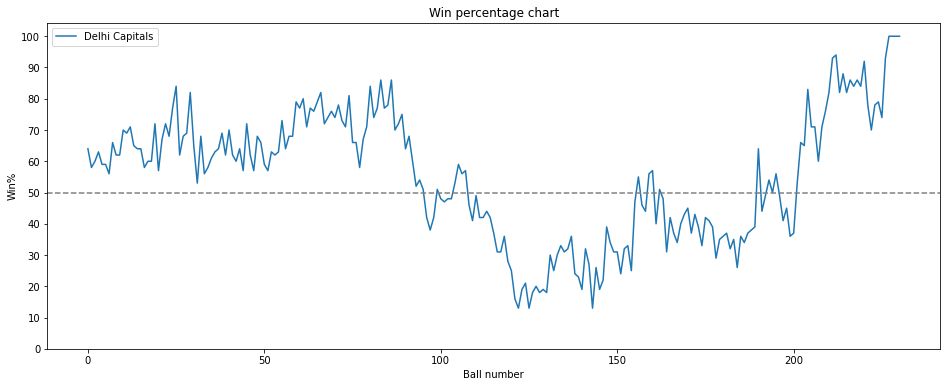

In [83]:
x_values=[i for i in range(len(win_count_ls))]
y_values=win_count_ls
plt.figure(figsize=(16,6))
plt.plot(x_values,y_values,label=t2)
plt.axhline(50,ls='--',color='grey')
plt.yticks(list(range(0,101,10)))
plt.title('Win percentage chart')
plt.xlabel('Ball number')
plt.ylabel('Win%')
plt.legend()
plt.show()

In [84]:
len(mdf)

231

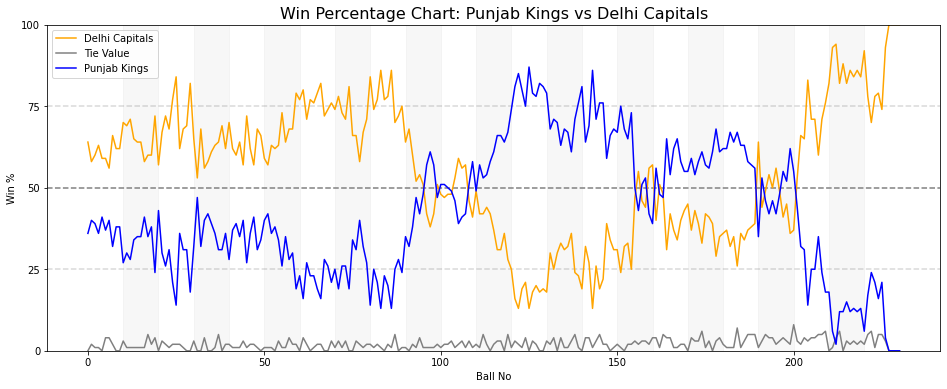

In [85]:
x1_values=[i for i in range(len(win_count_ls))]
y1_values=win_count_ls

x2_values=[i for i in range(len(tie_count_ls))]
y2_values=tie_count_ls

x3_values=[i for i in range(len(lose_count_ls))]
y3_values=lose_count_ls

plt.figure(figsize=(16,6))

for i in range(10,len(mdf),20):
    if i < len(mdf) - 10:
        plt.axvspan(xmin=i,xmax=i+10,ymin=0,ymax=100,alpha=0.06,color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()